In [16]:
from lib.models import ResNet
from lib.datasets import Dataset2p0
from torch.utils.data import DataLoader
import torch
from torch import nn
from tqdm import tqdm
from lib.utils import cms,test_evaluation
import matplotlib.pyplot as plt

In [17]:
device = 'cuda'
model = ResNet().to(device)

params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)
data_dir = 'w1_small_unbalanced_normalized'
trainloader = DataLoader(Dataset2p0(dir=f'{data_dir}/train/',labels=f'{data_dir}/y_train.pt'),batch_size=64,shuffle=True)
devloader = DataLoader(Dataset2p0(dir=f'{data_dir}/test/',labels=f'{data_dir}/y_test.pt'),batch_size=64,shuffle=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Params:  8187


In [42]:
lossi = []

In [43]:
model.train()
for i in range(5):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())

100%|██████████| 675/675 [00:17<00:00, 38.59it/s]


tensor(0.2312)


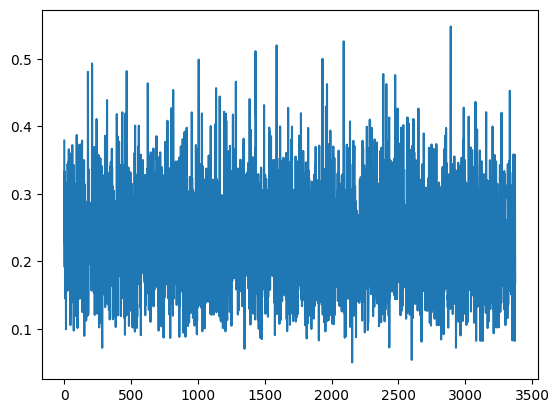

In [44]:
plt.plot(lossi)
print(torch.tensor(lossi[-1000:]).mean())

tensor(0.2159)


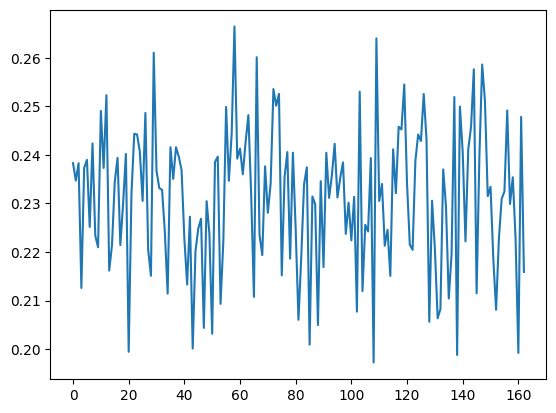

In [45]:
plt.plot(torch.tensor(lossi[100:len(lossi) - len(lossi)%20]).view(-1,20).mean(axis=1))
print(torch.tensor(lossi[100:len(lossi) - len(lossi)%20]).view(-1,20).mean(axis=1)[-1])

100%|██████████| 675/675 [00:09<00:00, 74.71it/s]


0.23014021812765686

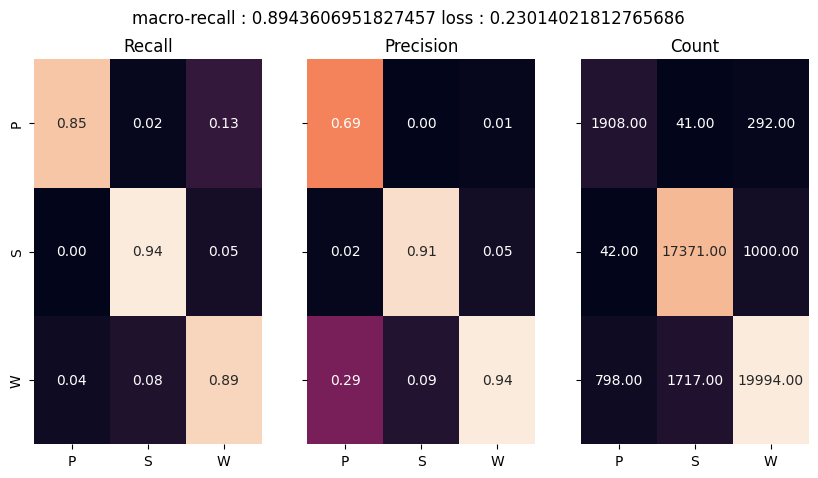

In [46]:
test_evaluation(trainloader,model,criterion)

100%|██████████| 675/675 [00:08<00:00, 76.22it/s]


0.2297308768939089

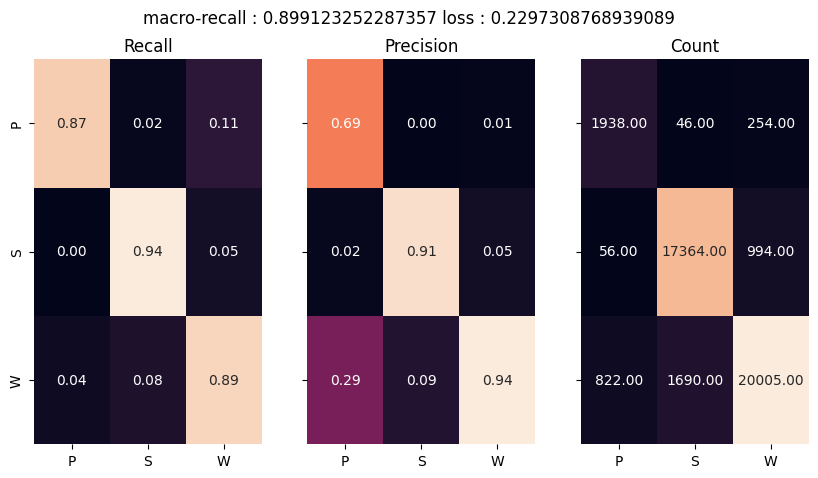

In [47]:
test_evaluation(devloader,model,criterion)